# DecisionTreeClassifier

In [1]:
import warnings
import joblib
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.tree import DecisionTreeClassifier, export_graphviz, export_text
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import train_test_split, GridSearchCV, cross_validate, validation_curve

In [2]:
df = pd.read_csv("diabetes.csv")

In [3]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
y = df["Outcome"]
X = df.drop(["Outcome"], axis=1)

In [5]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

In [6]:
y_pred = cart_model.predict(X)

In [7]:
#y_prob for AUC:
y_prob = cart_model.predict_proba(X)[:, 1]

In [8]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       500
           1       1.00      1.00      1.00       268

    accuracy                           1.00       768
   macro avg       1.00      1.00      1.00       768
weighted avg       1.00      1.00      1.00       768



In [9]:
# AUC
roc_auc_score(y, y_prob)

1.0

# Метод Holdout (удержания)

**Метод Holdout** — это самый простой метод оценки классификатора. В этом методе набор данных (набор элементов данных или примеров) разделяется на два набора, называемых обучающим набором и тестовым набором.
В методе удержания набор данных секционируется таким образом: максимальное количество данных принадлежит обучающему набору, а оставшиеся данные принадлежат тестовому набору.

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.30, random_state=85)

In [11]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X_train, y_train)

In [12]:
# Train Error
y_pred = cart_model.predict(X_train)
y_prob = cart_model.predict_proba(X_train)[:, 1]
print(classification_report(y_train, y_pred))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       349
           1       1.00      1.00      1.00       188

    accuracy                           1.00       537
   macro avg       1.00      1.00      1.00       537
weighted avg       1.00      1.00      1.00       537



In [13]:
roc_auc_score(y_train, y_prob)

1.0

In [14]:
# Test Error
y_pred = cart_model.predict(X_test)
y_prob = cart_model.predict_proba(X_test)[:, 1]
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.77      0.76      0.76       151
           1       0.56      0.56      0.56        80

    accuracy                           0.69       231
   macro avg       0.66      0.66      0.66       231
weighted avg       0.69      0.69      0.69       231



In [15]:
roc_auc_score(y_test, y_prob)

0.6620447019867549

# Cross Validation

In [16]:
cart_model = DecisionTreeClassifier(random_state=17).fit(X, y)

In [17]:
cv_results = cross_validate(cart_model,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "f1", "roc_auc"])

In [18]:
cv_results['test_accuracy'].mean()

0.7148496240601504

In [19]:
cv_results['test_f1'].mean()

0.5780669232692448

In [20]:
cv_results['test_roc_auc'].mean()

0.6796239316239316

# Оптимизация гиперпараметров с GridSearchCV

In [21]:
cart_model.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [22]:
# Гиперпараметр настроен для поиска:
cart_params = {'max_depth': range(1, 11),
               "min_samples_split": range(2, 20)}

In [23]:
# GridSearchCV
cart_best_grid = GridSearchCV(cart_model,
                              cart_params,
                              cv=5,
                              n_jobs=-1,
                              verbose=True).fit(X, y)

Fitting 5 folds for each of 180 candidates, totalling 900 fits


In [24]:
# Лучшие значения гиперпараметров:
cart_best_grid.best_params_

{'max_depth': 5, 'min_samples_split': 4}

In [25]:
# Best score:
cart_best_grid.best_score_

0.7500806383159324

In [26]:
random = X.sample(1, random_state=45)
print(random)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
195            5      158             84             41      210  39.4   

     DiabetesPedigreeFunction  Age  
195                     0.395   29  


In [27]:
cart_best_grid.predict(random)

array([1])

# Окончательная модель

In [28]:
cart_final = DecisionTreeClassifier(**cart_best_grid.best_params_,
                                    random_state=17).fit(X, y)

In [29]:
cart_final.get_params()

{'ccp_alpha': 0.0,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': 5,
 'max_features': None,
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_samples_leaf': 1,
 'min_samples_split': 4,
 'min_weight_fraction_leaf': 0.0,
 'random_state': 17,
 'splitter': 'best'}

In [30]:
# Другой способ назначить модели лучшие параметры:
cart_final = cart_model.set_params(**cart_best_grid.best_params_).fit(X, y)

In [31]:
# CV error модели:
cv_results = cross_validate(cart_final,
                            X, y,
                            cv=10,
                            scoring=["accuracy", "f1", "roc_auc"])

In [32]:
cv_results['test_accuracy'].mean()


0.7344326725905673

In [33]:
cv_results['test_f1'].mean()


0.5701221536747852

In [34]:
cv_results['test_roc_auc'].mean()


0.7710925925925926

# Важность признаков

In [35]:
def plot_importance(model, features, num=len(X), save=False):
    feature_imp = pd.DataFrame({'Value': model.feature_importances_, 'Feature': features.columns})
    plt.figure(figsize=(10, 10))
    sns.set(font_scale=1)
    sns.barplot(x="Value", y="Feature", data=feature_imp.sort_values(by="Value",
                                                                     ascending=False)[0:num])
    plt.title('Features')
    plt.tight_layout()
    plt.show()
    if save:
        plt.savefig('importances.png')

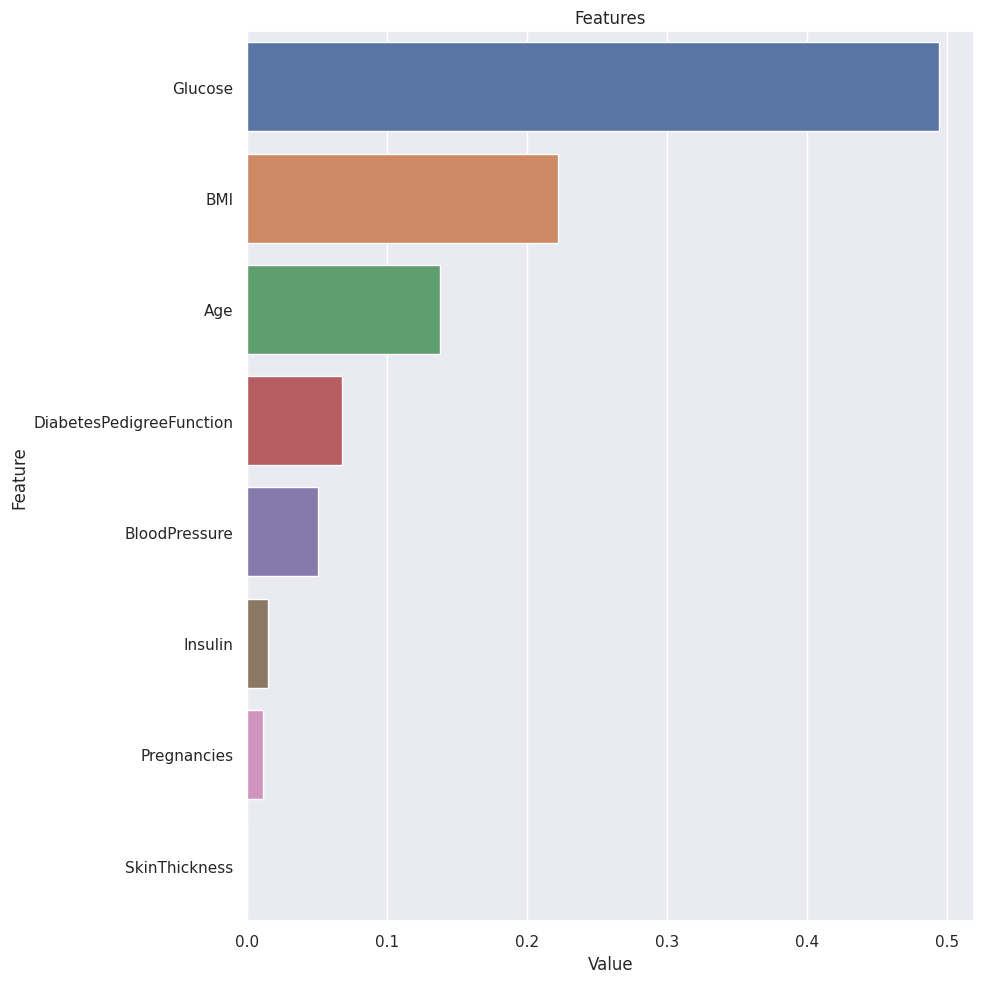

In [36]:
plot_importance(cart_final, X, 15)

# Анализ сложности модели с помощью кривых обучения

In [37]:
train_score, test_score = validation_curve(
    cart_final, X=X, y=y,
    param_name='max_depth',
    param_range=range(1, 11),
    scoring="roc_auc",
    cv=10)

In [38]:
mean_train_score = np.mean(train_score, axis=1)

In [39]:
mean_test_score = np.mean(test_score, axis=1)

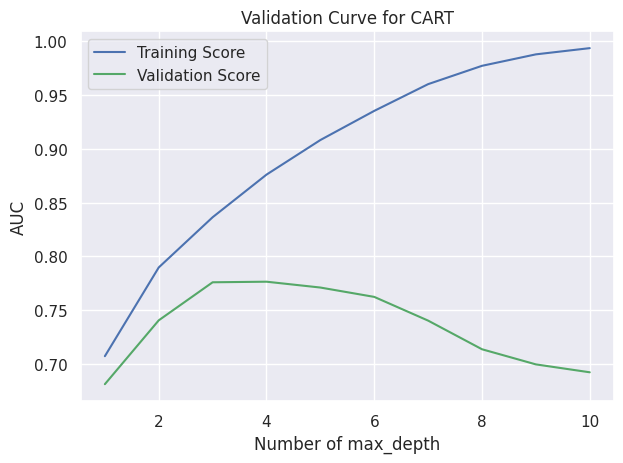

In [40]:
plt.plot(range(1, 11), mean_train_score,
         label="Training Score", color='b')
plt.plot(range(1, 11), mean_test_score,
         label="Validation Score", color='g')

plt.title("Validation Curve for CART")
plt.xlabel("Number of max_depth")
plt.ylabel("AUC")
plt.tight_layout()
plt.legend(loc='best')
plt.show()

# Извлечение решающих правил (Decision Rules)

In [41]:
tree_rules = export_text(cart_model, feature_names=list(X.columns))
print(tree_rules)

|--- Glucose <= 127.50
|   |--- Age <= 28.50
|   |   |--- BMI <= 45.40
|   |   |   |--- BMI <= 30.95
|   |   |   |   |--- Pregnancies <= 7.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- Pregnancies >  7.50
|   |   |   |   |   |--- class: 1
|   |   |   |--- BMI >  30.95
|   |   |   |   |--- DiabetesPedigreeFunction <= 0.50
|   |   |   |   |   |--- class: 0
|   |   |   |   |--- DiabetesPedigreeFunction >  0.50
|   |   |   |   |   |--- class: 0
|   |   |--- BMI >  45.40
|   |   |   |--- BloodPressure <= 99.00
|   |   |   |   |--- class: 1
|   |   |   |--- BloodPressure >  99.00
|   |   |   |   |--- class: 0
|   |--- Age >  28.50
|   |   |--- BMI <= 26.35
|   |   |   |--- BMI <= 9.65
|   |   |   |   |--- class: 1
|   |   |   |--- BMI >  9.65
|   |   |   |   |--- class: 0
|   |   |--- BMI >  26.35
|   |   |   |--- Glucose <= 99.50
|   |   |   |   |--- Glucose <= 28.50
|   |   |   |   |   |--- class: 1
|   |   |   |   |--- Glucose >  28.50
|   |   |   |   |   |--- class: 0
|   |  